<a id="imports"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Imports</center></h1>



In [49]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint

<a id="LoadData"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Loading Data</center></h1>



In [50]:
df = pd.read_csv('/content/1_breast-cancer.csv')

In [51]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8494032,B,9.653,33.08,106.94,503.2,0.14854,0.11601,0.1119,0.04561,...,9.62,30.42,71.70,947.2,0.11274,0.15855,0.223,0.089,0.3440,0.06432
1,8277134,B,9.909,15.22,77.27,836.9,0.16332,0.21563,0.0992,0.07729,...,8.87,40.17,101.46,291.3,0.17684,0.52630,0.326,0.159,0.3225,0.12311
2,6433438,M,16.590,27.63,56.24,290.9,0.05767,0.03576,0.2013,0.02446,...,16.35,13.88,66.39,987.8,0.14559,0.52898,0.150,0.072,0.4039,0.13237
3,8120296,M,16.529,18.91,112.90,878.6,0.07389,0.13996,0.0173,0.05447,...,13.67,24.39,84.68,526.6,0.11646,0.56898,1.218,0.121,0.3664,0.09014
4,8213475,M,15.550,27.70,106.07,387.0,0.13174,0.21961,0.0285,0.00471,...,8.50,34.17,52.25,587.4,0.18958,0.51774,0.174,0.014,0.3266,0.14290


In [52]:
df.drop('id', axis=1, inplace=True) #drop redundant columns

In [53]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,9.653,33.08,106.94,503.2,0.14854,0.11601,0.1119,0.04561,0.1869,...,9.62,30.42,71.70,947.2,0.11274,0.15855,0.223,0.089,0.3440,0.06432
1,B,9.909,15.22,77.27,836.9,0.16332,0.21563,0.0992,0.07729,0.2155,...,8.87,40.17,101.46,291.3,0.17684,0.52630,0.326,0.159,0.3225,0.12311
2,M,16.590,27.63,56.24,290.9,0.05767,0.03576,0.2013,0.02446,0.2110,...,16.35,13.88,66.39,987.8,0.14559,0.52898,0.150,0.072,0.4039,0.13237
3,M,16.529,18.91,112.90,878.6,0.07389,0.13996,0.0173,0.05447,0.2510,...,13.67,24.39,84.68,526.6,0.11646,0.56898,1.218,0.121,0.3664,0.09014
4,M,15.550,27.70,106.07,387.0,0.13174,0.21961,0.0285,0.00471,0.1403,...,8.50,34.17,52.25,587.4,0.18958,0.51774,0.174,0.014,0.3266,0.14290


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10224 entries, 0 to 10223
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                10224 non-null  object 
 1   radius_mean              10224 non-null  float64
 2   texture_mean             10224 non-null  float64
 3   perimeter_mean           10224 non-null  float64
 4   area_mean                10224 non-null  float64
 5   smoothness_mean          10224 non-null  float64
 6   compactness_mean         10224 non-null  float64
 7   concavity_mean           10224 non-null  float64
 8   concave points_mean      10224 non-null  float64
 9   symmetry_mean            10224 non-null  float64
 10  fractal_dimension_mean   10224 non-null  float64
 11  radius_se                10224 non-null  float64
 12  texture_se               10224 non-null  float64
 13  perimeter_se             10224 non-null  float64
 14  area_se               

<a id="EDA"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>EDA</center></h1>
    


In [55]:
px.pie(df, 'diagnosis', color='diagnosis',color_discrete_sequence=['#007500','#5CFF5C'],title='Data Distribution')
# tạo biểu đồ tròn (pie chart) từ dữ liệu

## Từ biểu đồ này, chúng ta kết luận rằng:
Dữ liệu không cân bằng, độ chính xác sẽ không phải là một chỉ số đánh giá tốt cho tập dữ liệu này.

In [56]:
for column in  df.drop('diagnosis',axis=1).columns[:5]:
    fig = px.box(data_frame=df,x='diagnosis',color='diagnosis',y=column,color_discrete_sequence=['#007500','#5CFF5C'],orientation='v')
    fig.show()


In [57]:
for column in  df.drop('diagnosis',axis=1).columns[5:10]:
    fig = px.scatter(data_frame=df,color='diagnosis',x=column,color_discrete_sequence=['#007500','#5CFF5C'],)
    fig.show()


## Kiểm tra sự tương quan với mục tiêu

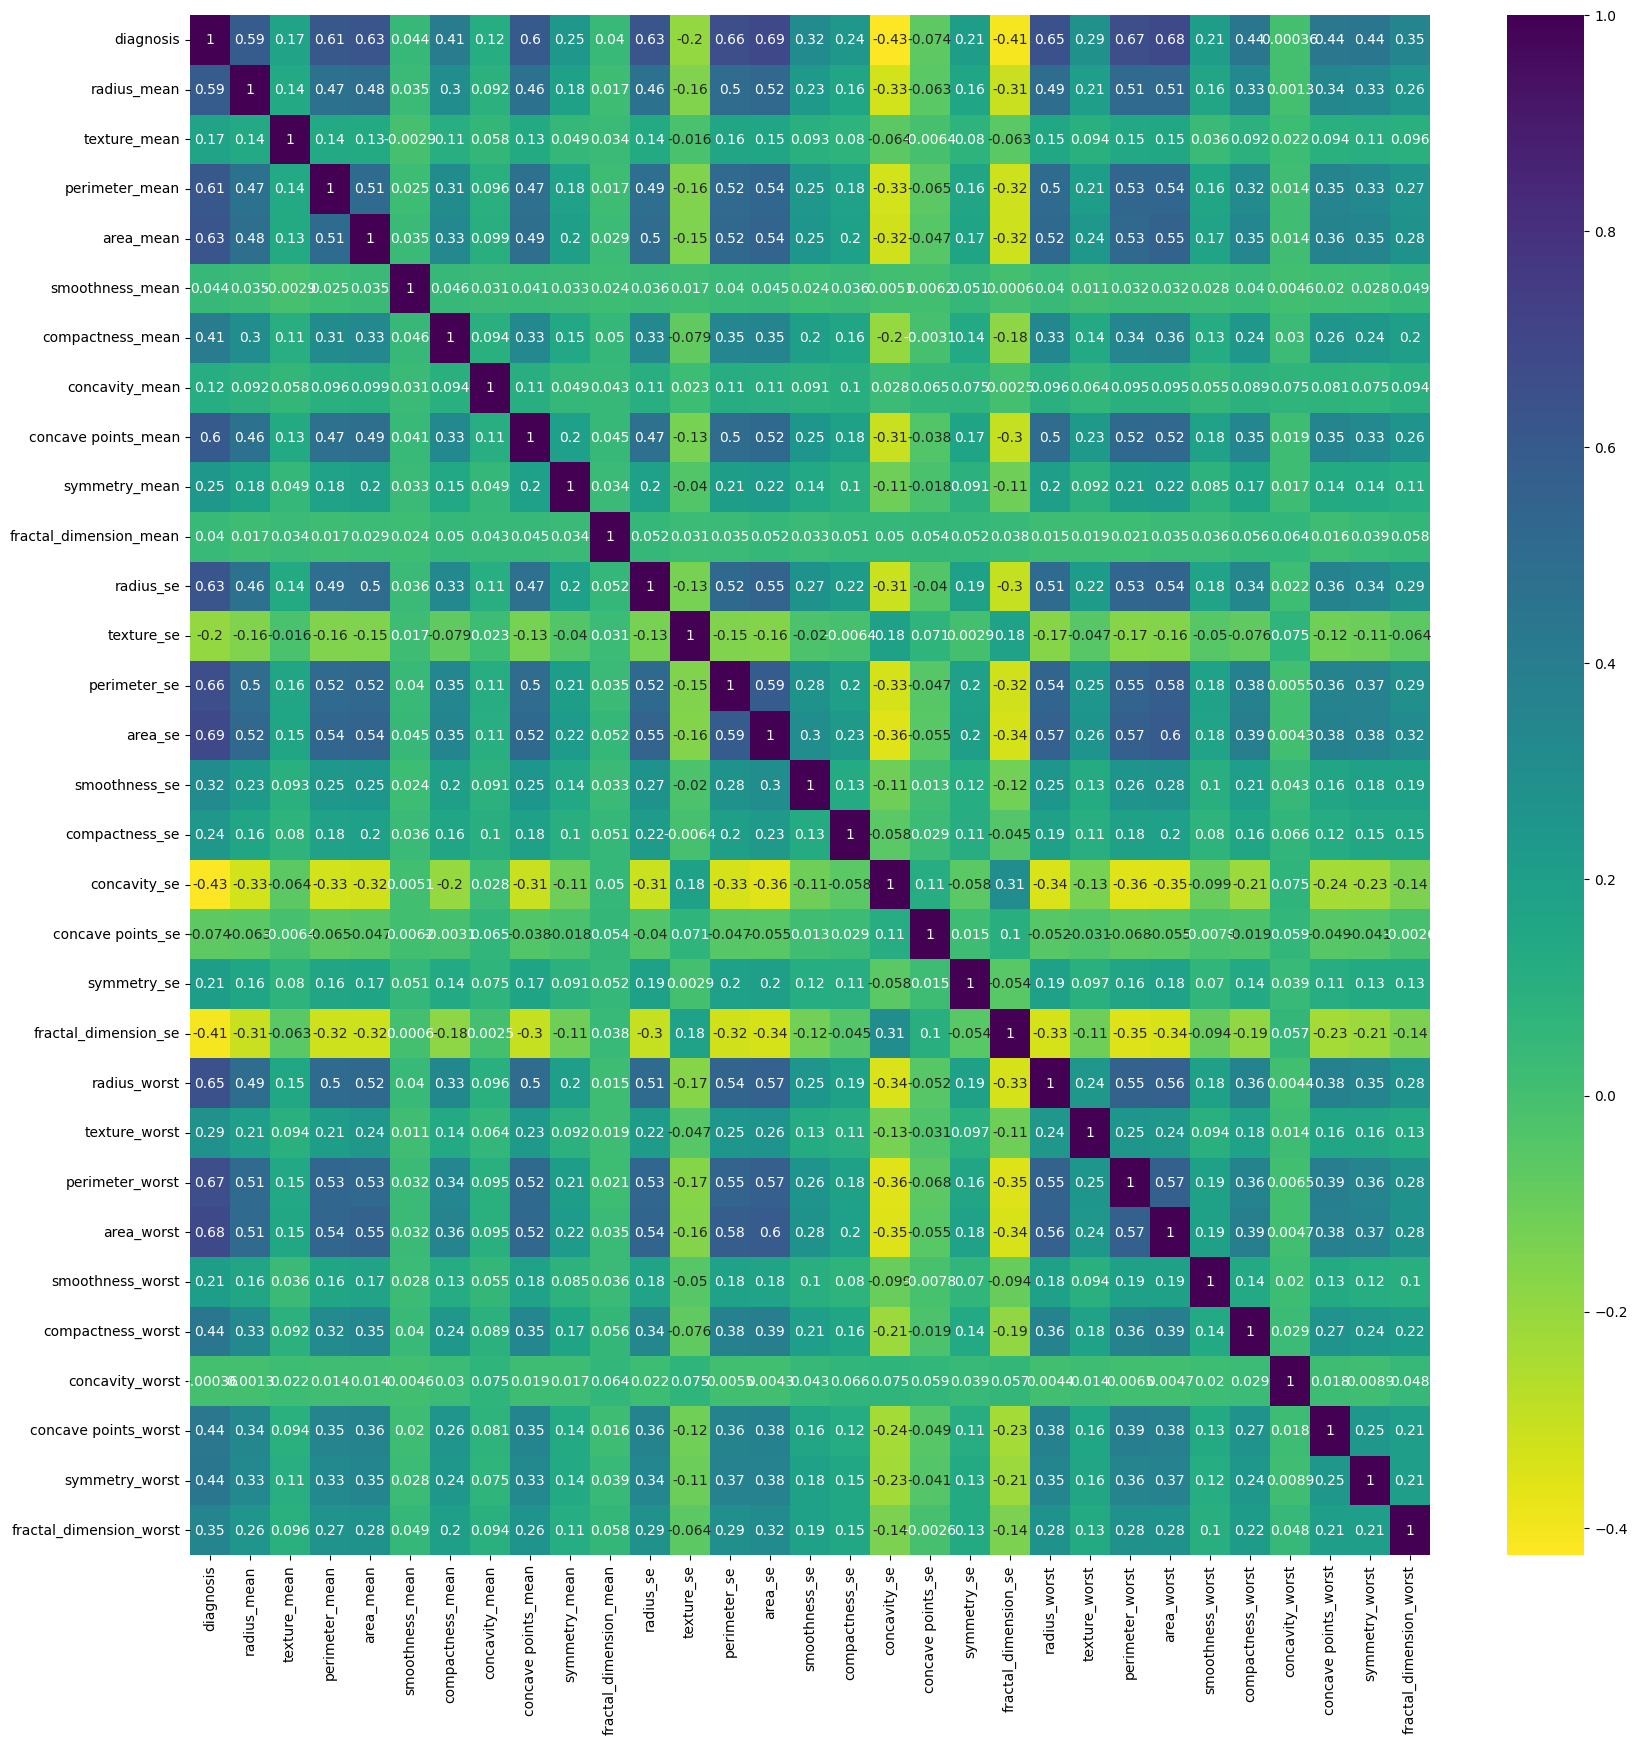

In [58]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='viridis_r',annot=True)
plt.show()

## Từ biểu đồ này, chúng ta kết luận rằng:
Một số đặc điểm không tương quan với mục tiêu, có thể chúng ta nên loại bỏ chúng.

<a id="FeatureSelection"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Feature Selection</center></h1>

# Feature Selection


In [59]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.99)
relevant_features = cor_target[cor_target>0.25]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')
# Display the results
pprint.pprint(names)

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'concavity_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


**Assign trainning data and training labels**

In [60]:
X = df[names].values
y = df['diagnosis'].values.reshape(-1,1)

In [61]:
def scale(X):
    """
    Standardizes the data in the array X.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).

    Returns:
        numpy.ndarray: The standardized features array.
    """
    # Calculate the mean and standard deviation of each feature
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Standardize the data
    X = (X - mean) / std

    return X

In [62]:
X = scale(X)

<a id="ModelImplementation"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Model Implementation</center></h1>

# Model Implementation


# Cách thuật toán hoạt động như sau:

Bắt đầu với tất cả các ví dụ ở nút gốc.

Tính toán lợi ích thông tin để chia dữ liệu trên tất cả các đặc điểm có thể và chọn ra đặc điểm có giá trị lợi ích cao nhất.

Tiếp theo, chúng ta sẽ chia dữ liệu theo đặc điểm được chọn.

Lặp lại quá trình này cho đến khi đạt đến các tiêu chí dừng.

## Key Points:

### Entropy
*Hàm entropy là một cách để đo lường sự không đồng nhất của dữ liệu. Entropy được biểu diễn bởi công thức sau:*
$$H = -\sum\limits_{}^{} p_{i}\text{log}_2 p_{i}
$$

**Trong đó $(p_1)$ là tỷ lệ của các ví dụ thuộc vào một lớp cụ thể**


### Information Gain

**Information gain là sự giảm entropy khi thực hiện một phép chia.**

**Recall là chọn phép chia mà cung cấp  cao nhất information gain cao nhấ, information gain  =**

**$$H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$**
**trong đó**
- $H(p_1^\text{node})$ là entropy của nút
- $H(p_1^\text{left})$ và $H(p_1^\text{right})$ là các entropy tại các nhánh trái và phải kết quả từ việc phân chia.
- $w^{\text{left}}$ và $w^{\text{right}}$ là tỷ lệ các ví dụ tại nhánh trái và nhánh phải tương ứng.



## Start the Implementation


### Node Class

In [63]:
# # xây dựng class TreeNode để tao nút cho cây quyết định
# class Node():
#     """
#     Một lớp đại diện cho một nút trong cây quyết định
#     """

#     def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, value=None):
#         """
#        Khởi tạo một thể hiện mới của lớp Node.

# Đối số:
#         feature: Đặc trưng được sử dụng để chia tại nút này. Mặc định là None.
#         threshold: Ngưỡng được sử dụng để chia tại nút này. Mặc định là None.
#         left: Nút con bên trái. Mặc định là None.
#         right: Nút con bên phải. Mặc định là None.
#         gain: Lợi ích của phân chia. Mặc định là None.
#         value: Nếu nút này là một nút lá, thuộc tính này biểu diễn giá trị dự đoán
#             cho biến mục tiêu. Mặc định là None.
#         """
#         self.feature = feature
#         self.threshold = threshold
#         self.left = left
#         self.right = right
#         self.gain = gain
#         self.value = value


### DecisionTree Class

In [64]:
def calculate_entropy(y):
    class_labels = np.unique(y)
    entropy = 0
    for label in class_labels:
        p_label = len(y[y == label]) / len(y)
        entropy -= p_label * np.log2(p_label)
    return entropy

# Hàm tính toán information gain của một lần chia
def calculate_information_gain(left, right, parent_entropy):
    num_left = len(left)
    num_right = len(right)
    num_total = num_left + num_right
    weighted_entropy = (num_left / num_total) * calculate_entropy(left) + (num_right / num_total) * calculate_entropy(right)
    return parent_entropy - weighted_entropy

# Hàm chia tập dữ liệu dựa trên một thuộc tính và giá trị
def split_dataset(dataset, feature, value):
    left = dataset[dataset[:, feature] <= value]
    right = dataset[dataset[:, feature] > value]
    return left, right

# Hàm tìm điểm chia tốt nhất
def find_best_split(dataset):
    best_split = {}
    max_gain = -float("inf")
    parent_entropy = calculate_entropy(dataset[:, -1])

    for feature in range(dataset.shape[1] - 1):
        unique_values = np.unique(dataset[:, feature])
        for value in unique_values:
            left, right = split_dataset(dataset, feature, value)
            if len(left) == 0 or len(right) == 0:
                continue
            gain = calculate_information_gain(left[:, -1], right[:, -1], parent_entropy)
            if gain > max_gain:
                max_gain = gain
                best_split = {
                    "feature": feature,
                    "value": value,
                    "left_dataset": left,
                    "right_dataset": right,
                    "gain": gain
                }
    return best_split

DT Class

In [65]:
# Lớp cho cây quyết định
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=10):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def create_leaf(self, y):
        return np.argmax(np.bincount(y.astype(int)))

    def build_tree(self, dataset, current_depth=0):
        X, y = dataset[:, :-1], dataset[:, -1]
        if len(y) < self.min_samples_split or current_depth >= self.max_depth or len(np.unique(y)) == 1:
            return self.create_leaf(y)

        best_split = find_best_split(dataset)
        if not best_split or best_split["gain"] == 0:
            return self.create_leaf(y)

        left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
        right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)

        return {
            "feature": best_split["feature"],
            "value": best_split["value"],
            "left": left_node,
            "right": right_node
        }

    def fit(self, X, y):
        dataset = np.concatenate((X, y.reshape(-1, 1)), axis=1)
        self.tree = self.build_tree(dataset)

    def predict_one(self, x, tree):
        if not isinstance(tree, dict):
            return tree
        feature = tree["feature"]
        if x[feature] <= tree["value"]:
            return self.predict_one(x, tree["left"])
        else:
            return self.predict_one(x, tree["right"])

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

<a id="Evaluation"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Evaluation</center></h1>

# Evaluation


In [66]:
def train_test_split(X, y, random_state=41, test_size=0.2):
    """
   Tham số:
    X (numpy.ndarray): Mảng đặc trưng có hình dạng (n_samples, n_features).
    y (numpy.ndarray): Mảng mục tiêu có hình dạng (n_samples,).
    random_state (int): Seed cho bộ sinh số ngẫu nhiên. Giá trị mặc định là 42.
    test_size (float): Tỷ lệ mẫu để bao gồm trong tập kiểm tra. Giá trị mặc định là 0.2.

Trả về:
    Tuple[numpy.ndarray]: Một tuple chứa X_train, X_test, y_train, y_test.

    """
    # Lấy số lượng mẫu.
    n_samples = X.shape[0]

    # Đặt hạt cho bộ sinh số ngẫu nhiên.
    np.random.seed(random_state)

    # Trộn các chỉ số.
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Xác định kích thước của tập kiểm tra.
    test_size = int(n_samples * test_size)

    # Chia các chỉ số thành tập kiểm tra và tập huấn luyện.
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Chia các mảng đặc trưng và mảng mục tiêu thành tập kiểm tra và tập huấn luyện.
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [67]:
def accuracy(y_true, y_pred):
    """
   Tham số:
- y_true (numpy array): Một mảng numpy của các nhãn thực cho mỗi điểm dữ liệu.
- y_pred (numpy array): Một mảng numpy của các nhãn dự đoán cho mỗi điểm dữ liệu.

Trả về:
- float: Độ chính xác của mô hình

    """
    y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples)

In [68]:
# def balanced_accuracy(y_true, y_pred):
#     """Tham số:
# - y_true (numpy array): Một mảng numpy của các nhãn thực cho mỗi điểm dữ liệu.
# - y_pred (numpy array): Một mảng numpy của các nhãn dự đoán cho mỗi điểm dữ liệu.


# Trả về:
# - balanced_acc : Độ chính xác cân bằng của mô hình


#     """
#     y_pred = np.array(y_pred)
#     y_true = y_true.flatten()
#     # Lấy số lớp.
#     n_classes = len(np.unique(y_true))


#     # Khởi tạo một mảng để lưu trữ độ nhạy và độ đặc hiệu cho mỗi lớp.
#     sen = []
#     spec = []
#     # Lặp qua mỗi lớp.
#     for i in range(n_classes):
#         # Tạo một mặt nạ cho các giá trị thực và dự đoán cho lớp i.
#         mask_true = y_true == i
#         mask_pred = y_pred == i


#         # tính true positive, true negative, false positive, và false negative values
#         TP = np.sum(mask_true & mask_pred)
#         TN = np.sum((mask_true != True) & (mask_pred != True))
#         FP = np.sum((mask_true != True) & mask_pred)
#         FN = np.sum(mask_true & (mask_pred != True))


#         # tính the sensitivity (true positive rate) and specificity (true negative rate)
#         sensitivity = TP / (TP + FN)
#         specificity = TN / (TN + FP)


#         # lưu the sensitivity và specificity cho class i
#         sen.append(sensitivity)
#         spec.append(specificity)
#     # tính balanced accuracy là trung bình của sensitivity và specificity cho mỗi lớp
#     average_sen =  np.mean(sen)
#     average_spec =  np.mean(spec)
#     balanced_acc = (average_sen + average_spec) / n_classes


#     return balanced_acc

In [69]:
import numpy as np

def balanced_accuracy(y_true, y_pred):
    """Tham số:
    - y_true (numpy array): Một mảng numpy của các nhãn thực cho mỗi điểm dữ liệu.
    - y_pred (numpy array): Một mảng numpy của các nhãn dự đoán cho mỗi điểm dữ liệu.

    Trả về:
    - balanced_acc : Độ chính xác cân bằng của mô hình
    """
    y_pred = np.array(y_pred)
    y_true = y_true.flatten()
    # Lấy số lớp.
    n_classes = len(np.unique(y_true))

    # Khởi tạo một mảng để lưu trữ độ nhạy và độ đặc hiệu cho mỗi lớp.
    sen = []
    spec = []
    # Lặp qua mỗi lớp.
    for i in range(n_classes):
        # Tạo một mặt nạ cho các giá trị thực và dự đoán cho lớp i.
        mask_true = y_true == i
        mask_pred = y_pred == i

        # Tính true positive, true negative, false positive, và false negative values
        TP = np.sum(mask_true & mask_pred)
        TN = np.sum((mask_true != True) & (mask_pred != True))
        FP = np.sum((mask_true != True) & mask_pred)
        FN = np.sum(mask_true & (mask_pred != True))

        # Tính the sensitivity (true positive rate) và specificity (true negative rate)
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        # Lưu the sensitivity và specificity cho class i
        sen.append(sensitivity)
        spec.append(specificity)

    # Tính balanced accuracy là trung bình của sensitivity và specificity cho mỗi lớp
    balanced_acc = np.mean(sen)

    # Tính toán ma trận nhầm lẫn
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=int)
    for i in range(n_classes):
        for j in range(n_classes):
            confusion_matrix[i, j] = np.sum((y_true == i) & (y_pred == j))

    # Tính precision, recall và F1-score cho mỗi lớp
    precision = []
    recall = []
    f1_score = []
    for i in range(n_classes):
        TP = confusion_matrix[i, i]
        FP = np.sum(confusion_matrix[:, i]) - TP
        FN = np.sum(confusion_matrix[i, :]) - TP
        precision.append(TP / (TP + FP) if (TP + FP) > 0 else 0)
        recall.append(TP / (TP + FN) if (TP + FN) > 0 else 0)
        f1_score.append(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0)


    return confusion_matrix, precision, recall, f1_score

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.2)

In [71]:
#Tạo một phiên bản mô hình
model = DecisionTree(100, 16)

# Điều chỉnh mô hình cây quyết định với dữ liệu huấn luyện
model.fit(X_train, y_train)

# "Sử dụng mô hình đã huấn luyện để dự đoán trên dữ liệu kiểm thử."
predictions = model.predict(X_test)

# In danh sách các nhãn lớp từ y_test và predictions
print("Unique labels in y_test:", np.unique(y_test))
print("Unique labels in predictions:", np.unique(predictions))

# tính toán các chỉ số


print(f"Custom Accuracy: {accuracy(y_test, predictions)}")
cm, precision, recall, f1_score = balanced_accuracy(y_test, predictions)

# In các giá trị đánh giá
print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Unique labels in y_test: [0 1]
Unique labels in predictions: [0 1]
Custom Accuracy: 0.934931506849315
Confusion Matrix:
[[1282   90]
 [  43  629]]
Precision: [0.9675471698113207, 0.874826147426982]
Recall: [0.934402332361516, 0.9360119047619048]
F1-score: [0.9506859473489062, 0.9043853342918764]


In [72]:
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier model object.
decision_tree_classifier = DecisionTreeClassifier()

# Train the decision tree classifier model using the training data.
decision_tree_classifier.fit(X_train, y_train)

# Use the trained model to make predictions on the test data.
sk_predictions = decision_tree_classifier.predict(X_test)

# Calculate evaluating metrics
print(f" Model's Accuracy: {accuracy(y_test, predictions)}")

 Model's Accuracy: 0.934931506849315


In [73]:
#So sánh dự đoán giữa các mô hình
matches = np.sum(predictions == sk_predictions)

#Tính phần trăm dự đoàn giống nhau
total_samples = len(predictions)

percentage_matches = (matches / total_samples) * 100
print(f"Percentage of matching predictions: {percentage_matches:.2f}%")

Percentage of matching predictions: 93.40%
